In [1]:
import numpy as np
import scipy.io
import cv2
from matplotlib import pyplot as plt

## load original images

In [4]:
# load input data
input_data = scipy.io.loadmat('../data/2010-08-30_fish_movie_frames.mat')

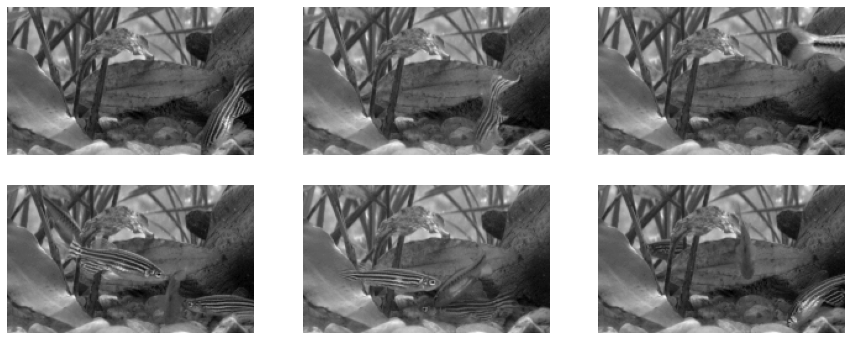

In [5]:
# show unfiltered frames
def show_random_frames(frames, nframes):
    assert(len(frames) >= nframes)
    
    plt.figure(figsize = (15, 3*nframes//3))
    for i in range(nframes):
        ind = np.random.randint(0,len(frames))
        plt.subplot(-(nframes//-3),3,i+1)
        plt.imshow(frames[ind], cmap='gray')
        plt.axis("off")

show_random_frames(input_data['frames'], 6)

## bilateral filter

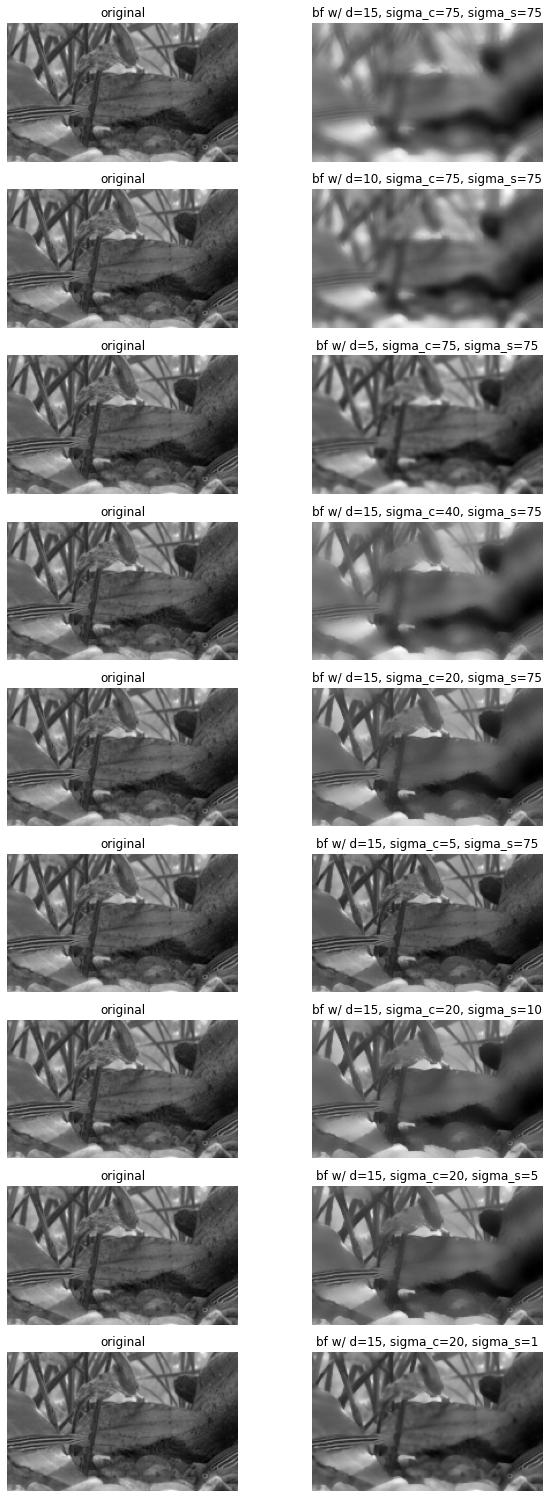

In [6]:
def explore_bf_params(img, d, sigma_c, sigma_s):
    assert(len(d)==len(sigma_c))
    assert(len(sigma_c)==len(sigma_s))
    
    n = len(d)
    plt.figure(figsize = (10, 3*n))
    for i in range(n):
        # show pre-filtered
        plt.subplot(n,2,2*i+1)
        plt.imshow(img, cmap='gray')
        plt.title("original")
        plt.axis("off")

        # apply bilateral filter
        bf_img = cv2.bilateralFilter(img, d[i], sigma_c[i], sigma_s[i])
        
        # show filtered
        plt.subplot(n,2,2*i+2)
        plt.imshow(bf_img, cmap='gray')
        plt.title("bf w/ d={}, sigma_c={}, sigma_s={}".format(d[i], sigma_c[i], sigma_s[i]))
        plt.axis("off")  

# choose a random frame
ind = np.random.randint(0,len(input_data['frames']))

# explore various parameter values
d = [15, 10, 5, 15, 15, 15, 15, 15, 15]
sigma_c = [75, 75, 75, 40, 20, 5, 20, 20, 20]
sigma_s = [75, 75, 75, 75, 75, 75, 10, 5, 1]
explore_bf_params(input_data['frames'][ind], d, sigma_c, sigma_s)

# -> chosen params: d = 15, sigma_c = 20, sigma_s = 75

In [7]:
# filter all frames with chose parameters
bf_frames = []

for i in range(len(input_data['frames'])):
    # Apply bilateral filter with d = 15,
    # sigmaColor = sigmaSpace = 75.
    bf_frames = bf_frames + [cv2.bilateralFilter(input_data['frames'][i], 15, 20, 75)]

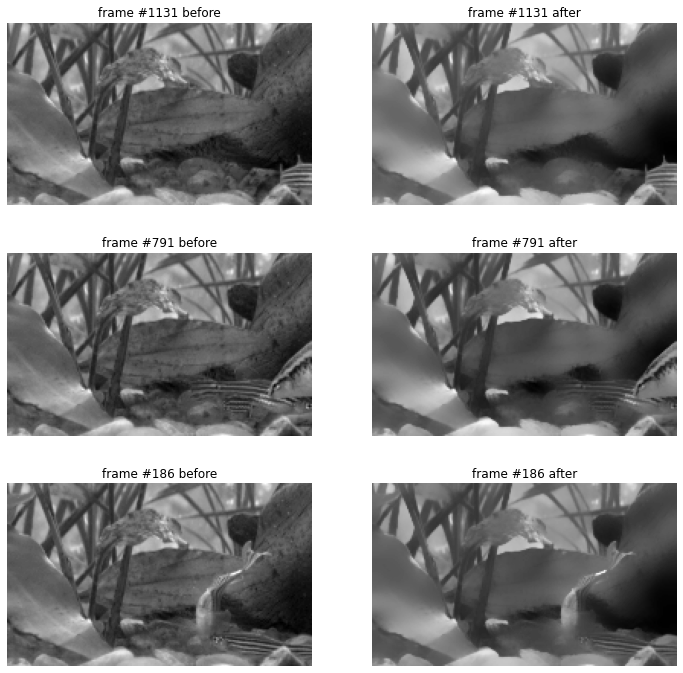

In [8]:
# show unfiltered vs. filtered frames
def show_before_after(unfiltered, filtered, nframes):
    assert(len(unfiltered)==len(filtered))
    assert(len(filtered) >= nframes)
    
    plt.figure(figsize = (12, 4*nframes))
    for i in range(nframes):
        ind = np.random.randint(0,len(filtered))
        
        plt.subplot(nframes,2,2*i+1)
        plt.imshow(unfiltered[ind], cmap='gray')
        plt.title("frame #{} before".format(ind))
        plt.axis("off")
        
        plt.subplot(nframes,2,2*i+2)
        plt.imshow(filtered[ind], cmap='gray')
        plt.title("frame #{} after".format(ind))
        plt.axis("off")
        
show_before_after(input_data['frames'], bf_frames, 3)